In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee/train.csv
/kaggle/input/employee/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
attrition = pd.read_csv("/kaggle/input/employee/train.csv")

In [4]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
len(attrition.columns)

35

In [7]:
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
attrition.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
categorical = attrition.select_dtypes(include = "object")
categorical.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [10]:
len(categorical.columns)

8

In [11]:
numerical = attrition.select_dtypes(include = ["float", "int64"])
numerical.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
len(numerical.columns)

27

<AxesSubplot:xlabel='Age', ylabel='Density'>

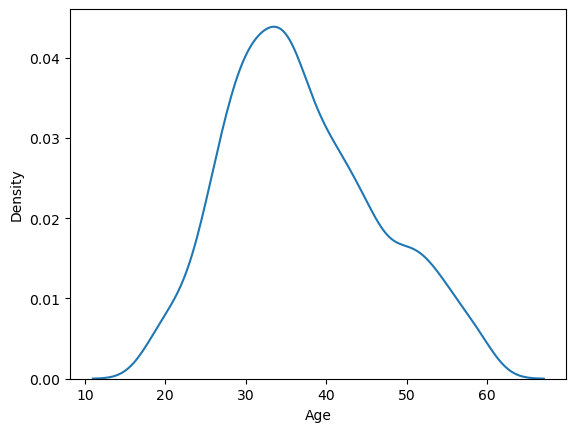

In [13]:
sns.kdeplot(attrition["Age"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

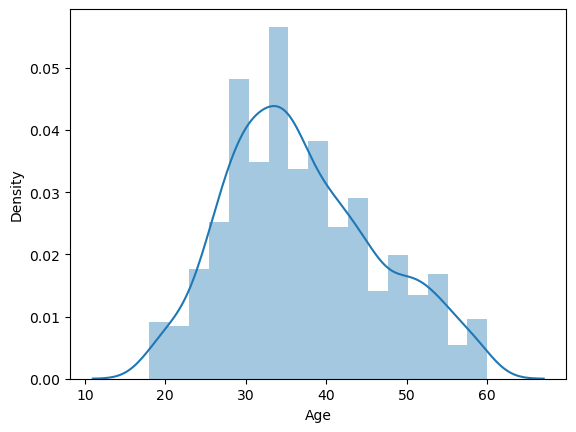

In [14]:
sns.distplot(attrition["Age"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

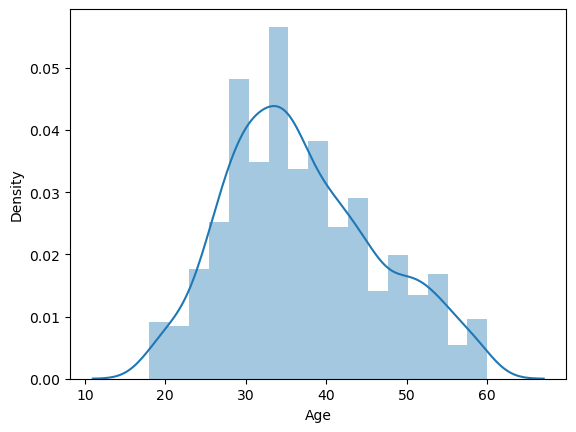

In [15]:
sns.distplot(attrition["Age"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarni

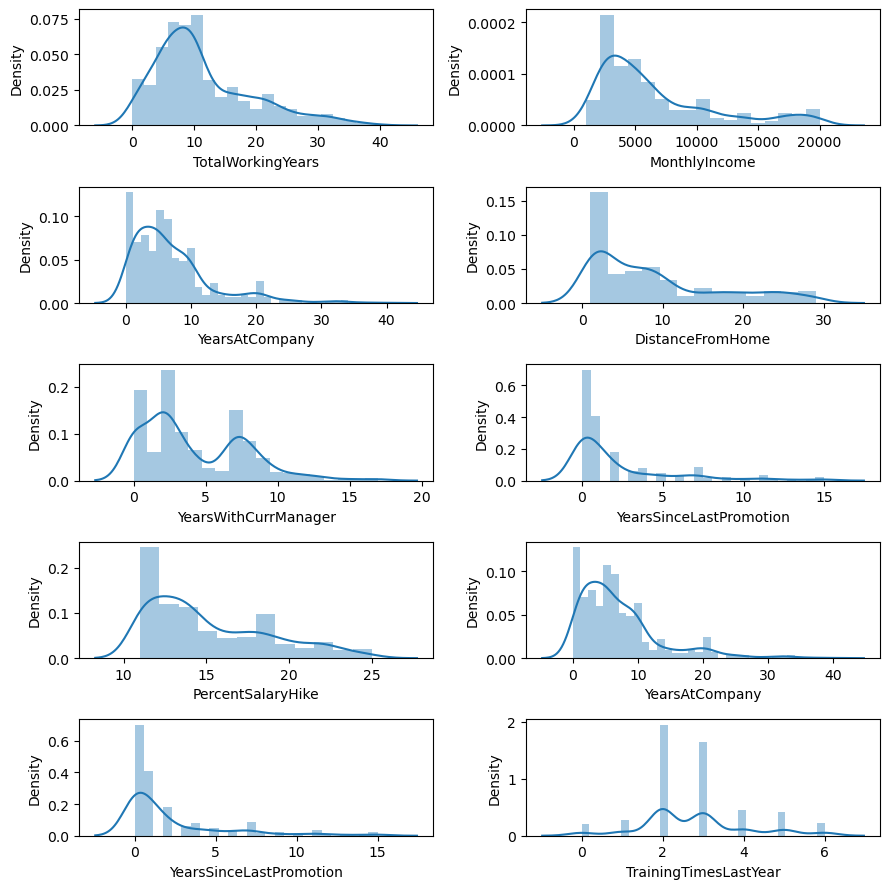

In [16]:
"""
TotalWorkingHours, MonthlyIncome, YearsAtCompany, DistanceFromHome, 
YearsWithCurrManager,YearsSinceLastPromotion,
PercentSalaryHike, YearsAtCompany, YearsSinceLastPromotion, TrainingTimesLastYear
"""
fig, ax = plt.subplots(5, 2, figsize = (9, 9))

sns.distplot(attrition["TotalWorkingYears"], ax = ax[0, 0])
sns.distplot(attrition["MonthlyIncome"], ax = ax[0, 1])
sns.distplot(attrition["YearsAtCompany"], ax = ax[1, 0])
sns.distplot(attrition["DistanceFromHome"], ax = ax[1,1])
sns.distplot(attrition["YearsWithCurrManager"], ax = ax[2, 0])
sns.distplot(attrition["YearsSinceLastPromotion"], ax = ax[2, 1])
sns.distplot(attrition["PercentSalaryHike"], ax = ax[3, 0])
sns.distplot(attrition["YearsAtCompany"], ax = ax[3, 1])
sns.distplot(attrition["YearsSinceLastPromotion"], ax = ax[4, 0])
sns.distplot(attrition["TrainingTimesLastYear"], ax = ax[4, 1])
plt.tight_layout()
plt.show()

In [17]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
sns.__version__

'0.12.2'

In [19]:
pip install seaborn.factorplot

ERROR: Could not find a version that satisfies the requirement seaborn.factorplot (from versions: none)
ERROR: No matching distribution found for seaborn.factorplot
Note: you may need to restart the kernel to use updated packages.


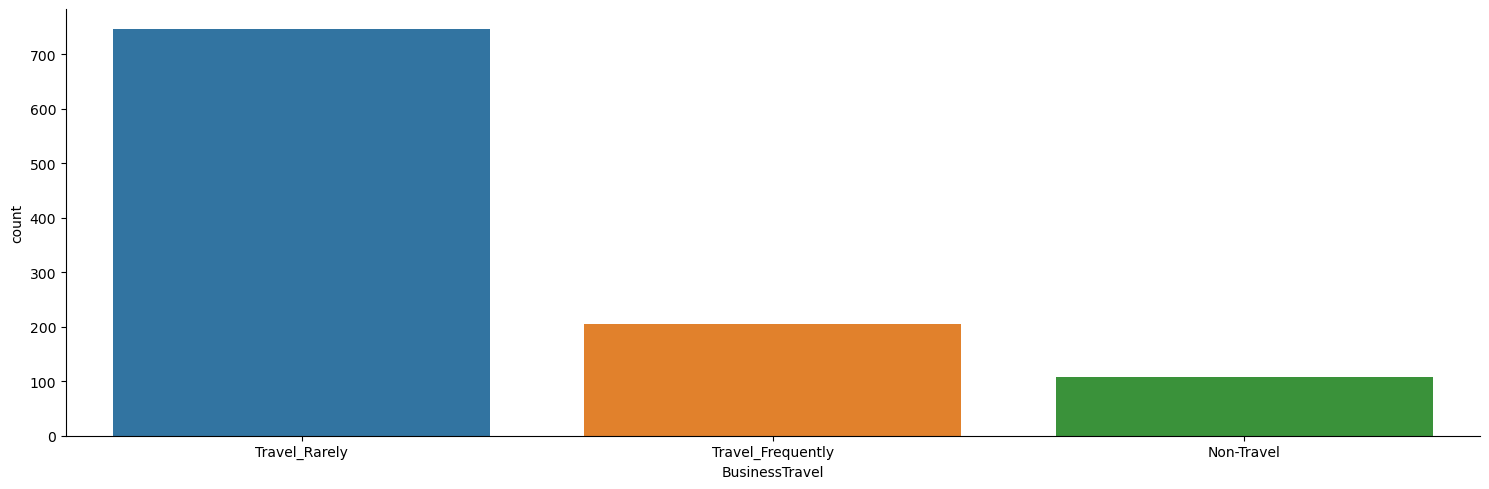

In [20]:
sns.catplot(data = attrition, kind = 'count', aspect = 3, x = "BusinessTravel")

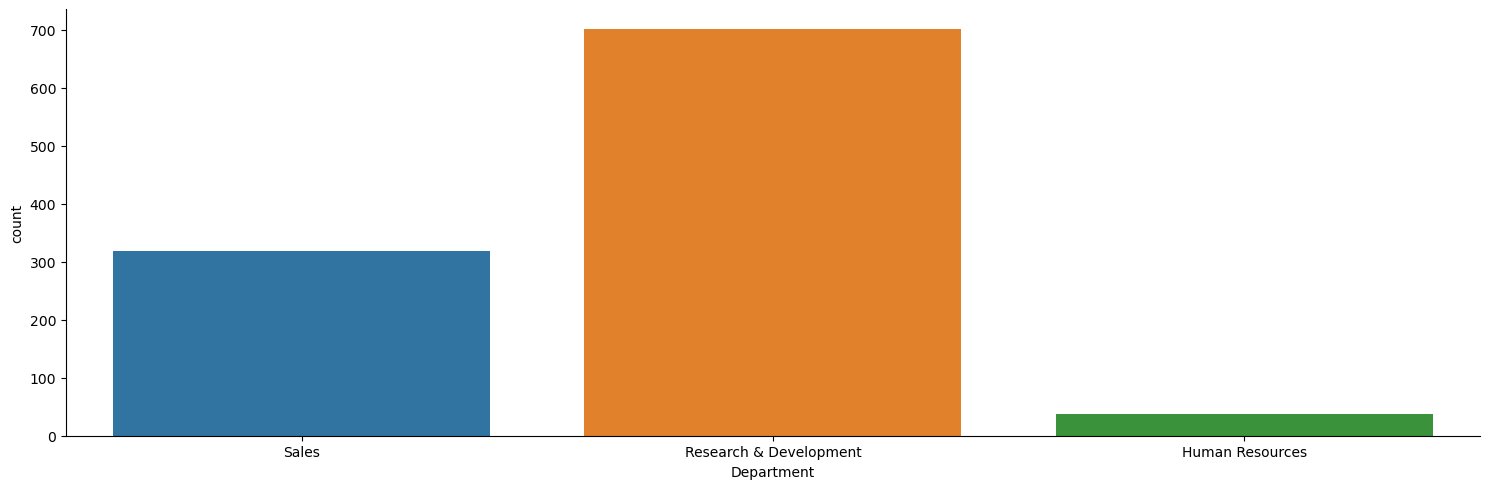

In [21]:
sns.catplot(data = attrition, kind = 'count', aspect = 3,x = "Department")

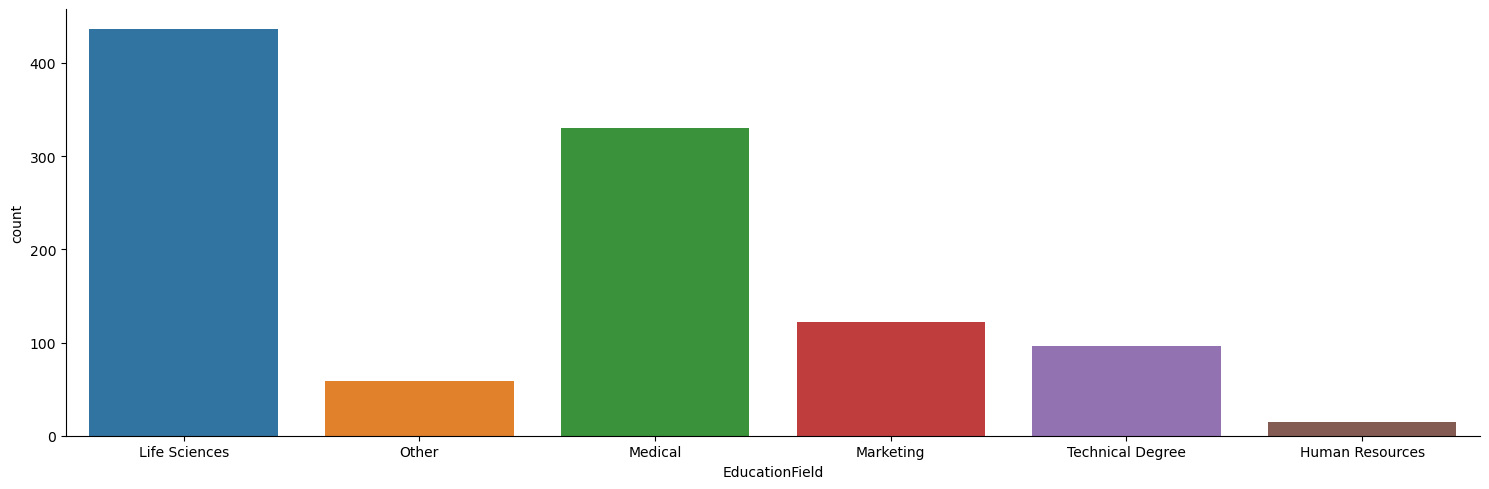

In [22]:
sns.catplot(data = attrition, kind = 'count', aspect = 3, x = "EducationField")

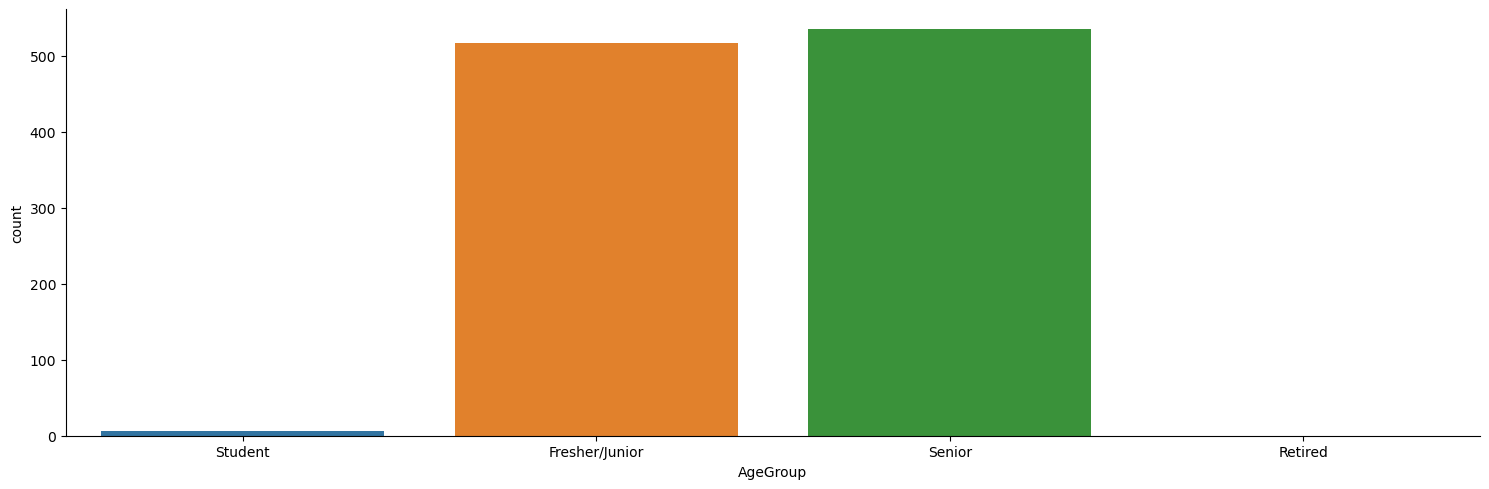

In [23]:
bins = [0, 18, 35, 60, np.inf]
labels = ["Student", "Fresher/Junior", "Senior", "Retired"]
attrition["AgeGroup"] = pd.cut(attrition["Age"], bins, labels = labels)
sns.catplot(data = attrition, kind = "count", aspect = 3, x = "AgeGroup")

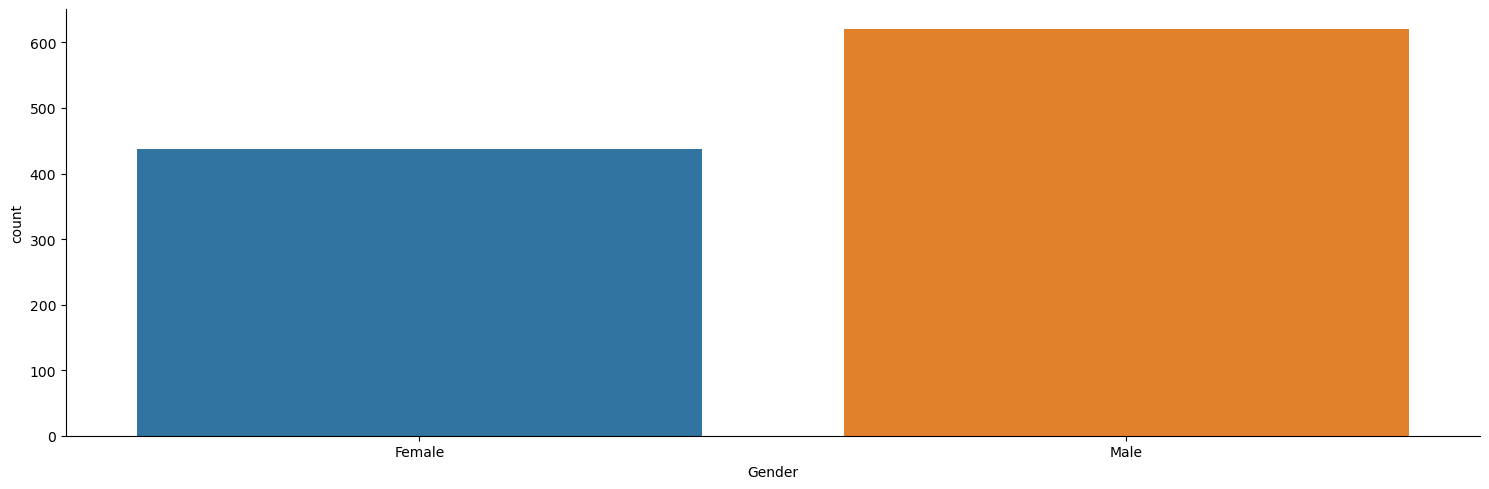

In [24]:
sns.catplot(data = attrition, kind = "count", aspect = 3, x = "Gender")

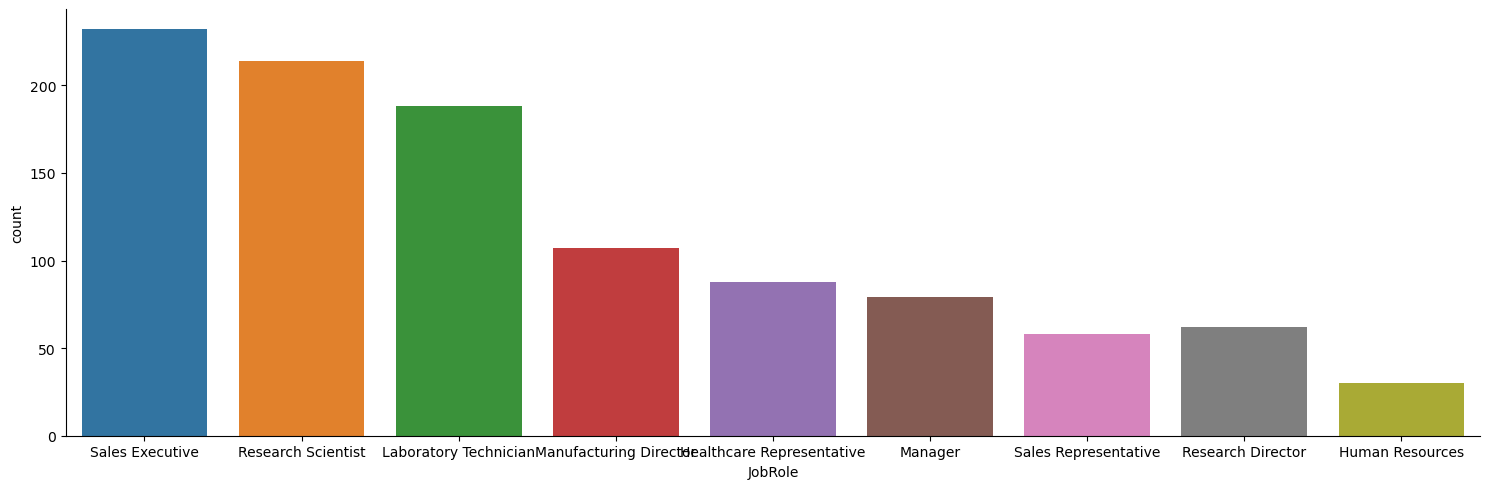

In [25]:
sns.catplot(data = attrition, kind = "count", aspect = 3, x = "JobRole")

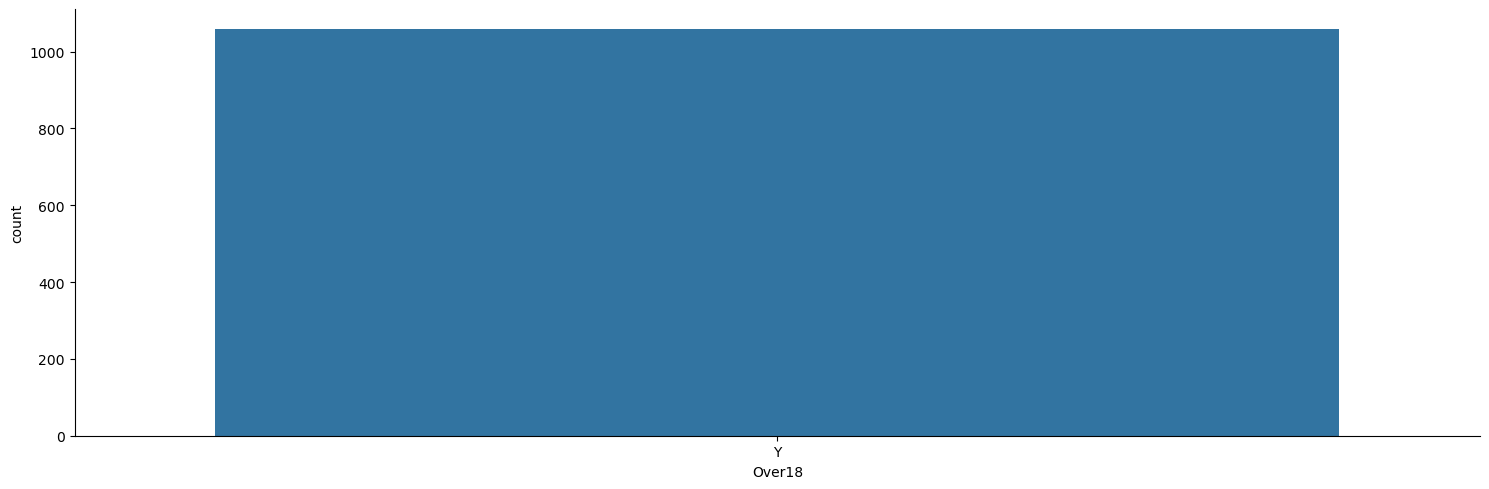

In [26]:
sns.catplot(data = attrition, kind = "count", aspect = 3, x = "Over18")

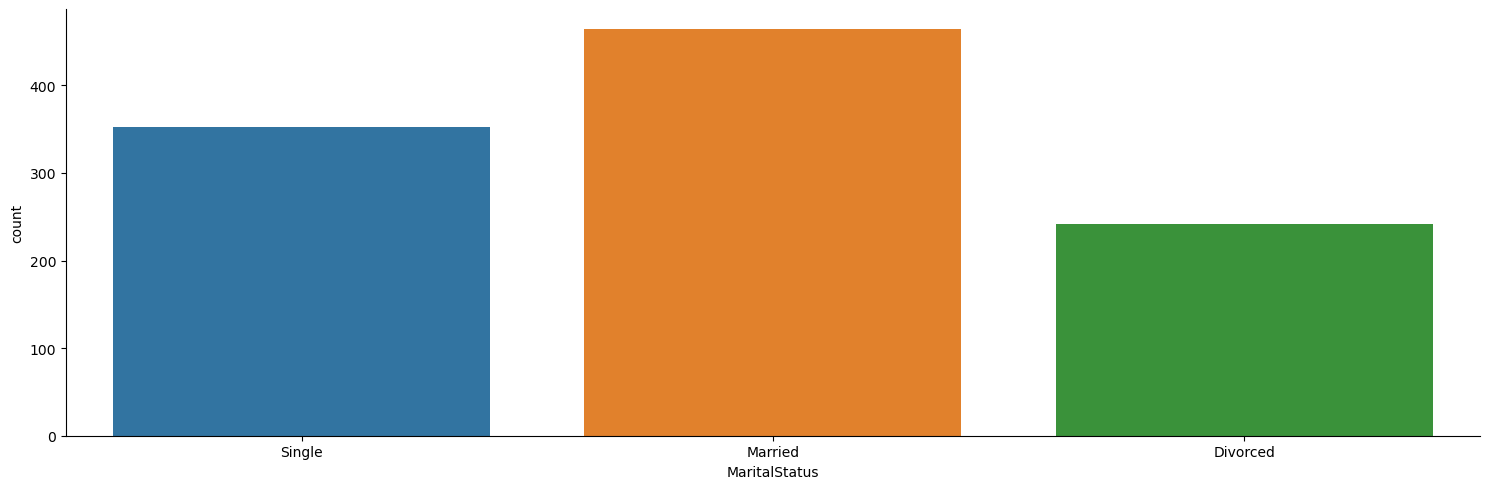

In [27]:
sns.catplot(data = attrition, kind = "count", aspect = 3, x = "MaritalStatus")

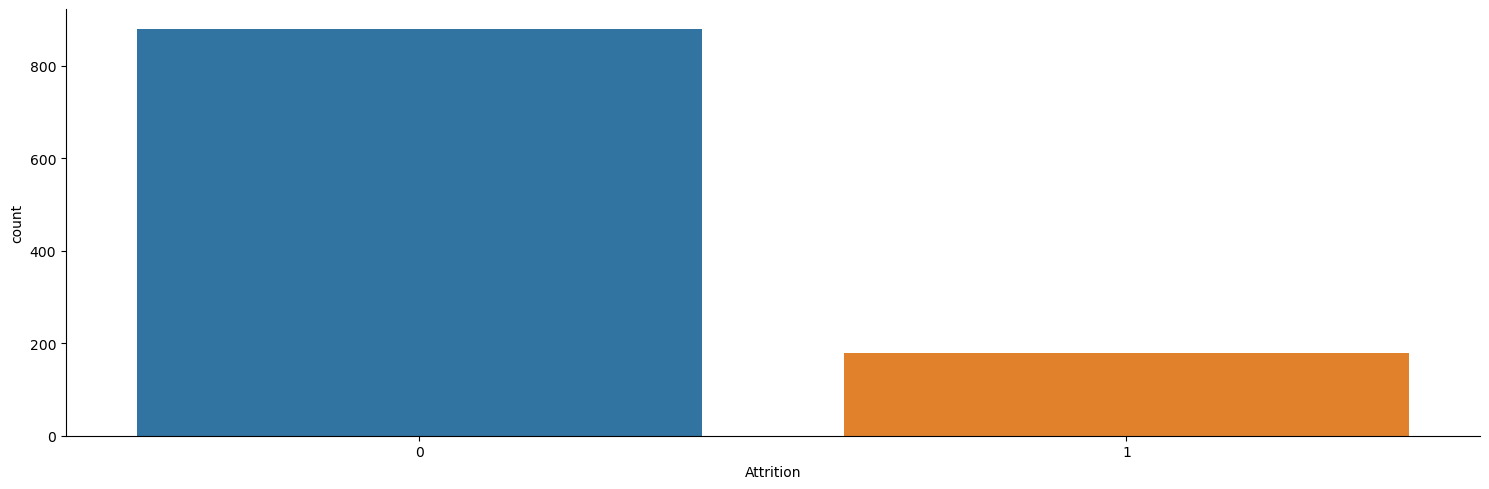

In [28]:
sns.catplot(data = attrition, kind = "count", aspect = 3, x = "Attrition")

<AxesSubplot:>

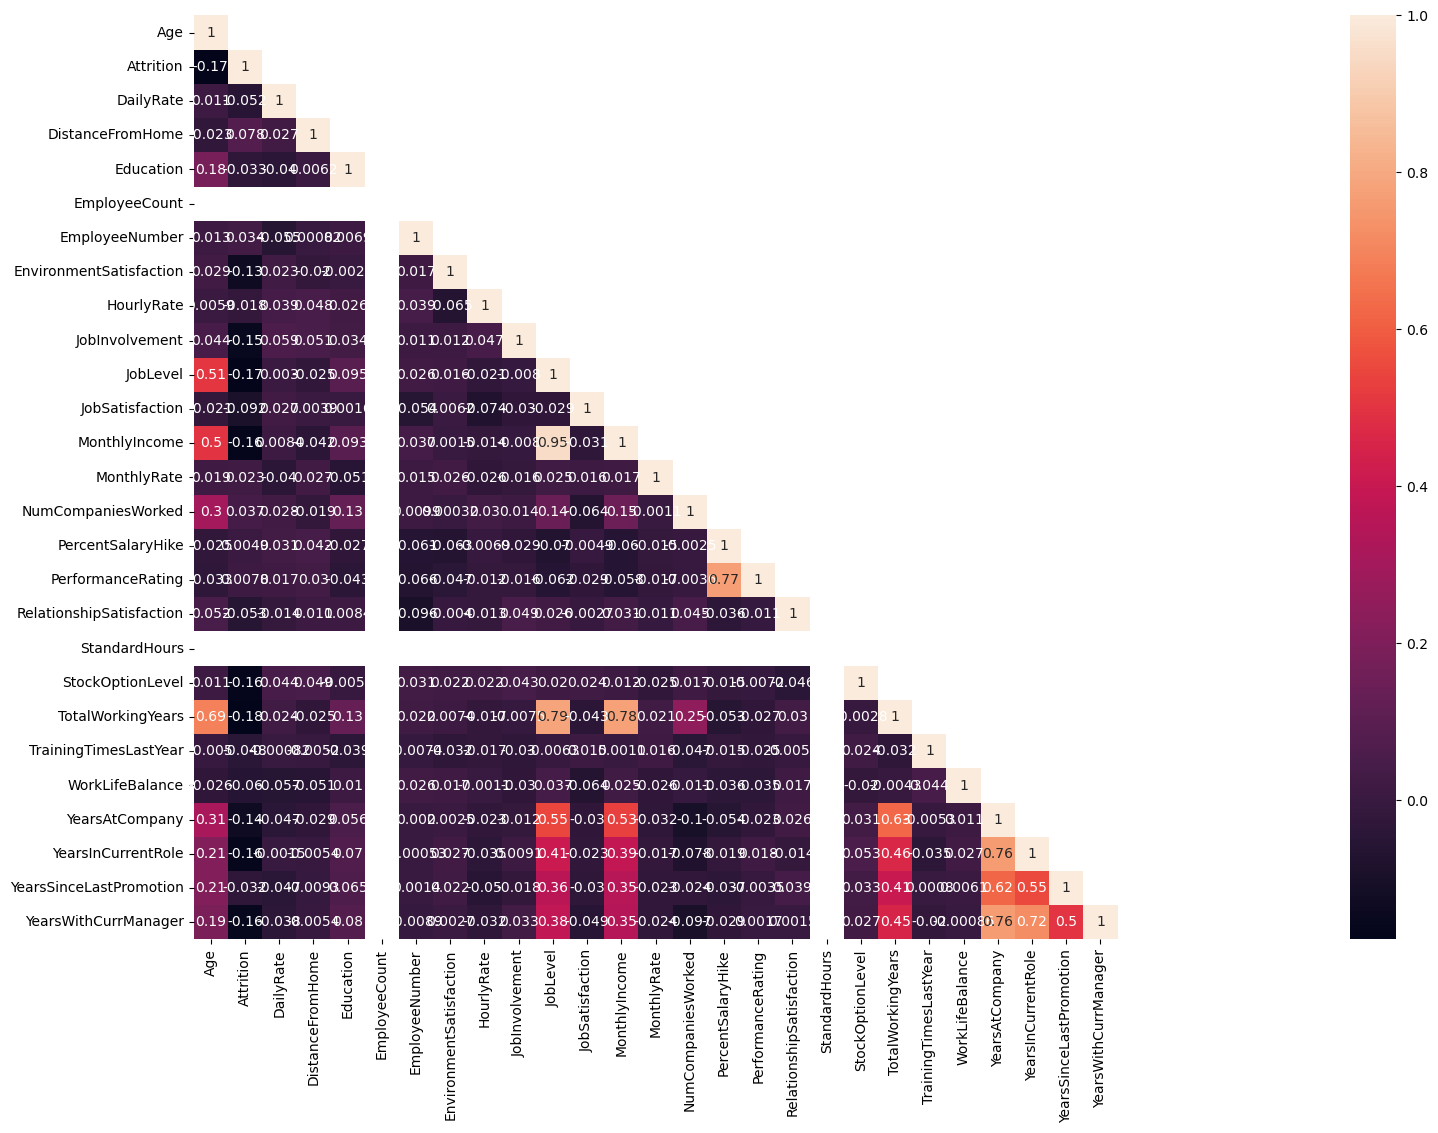

In [29]:
cor_mat = attrition.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(60, 12)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

In [30]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeGroup'],
      dtype='object')

In [31]:
continuous = [
    'Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'
]

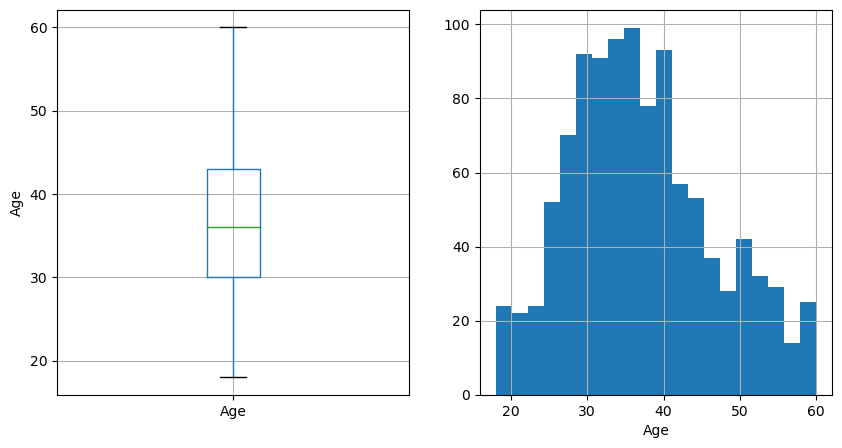

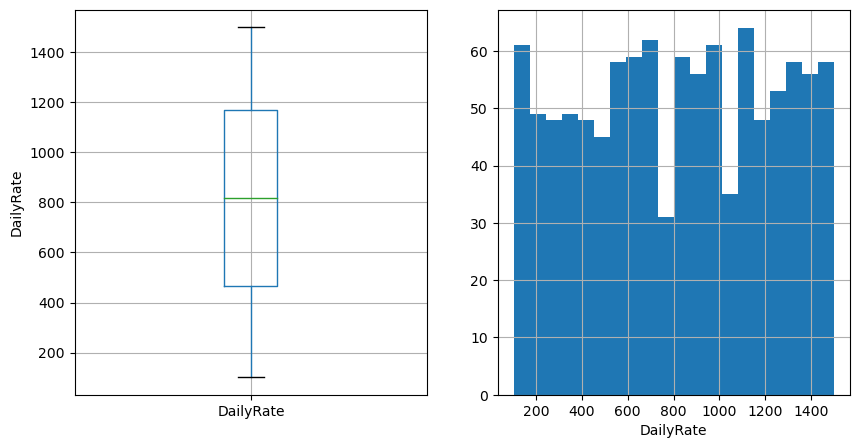

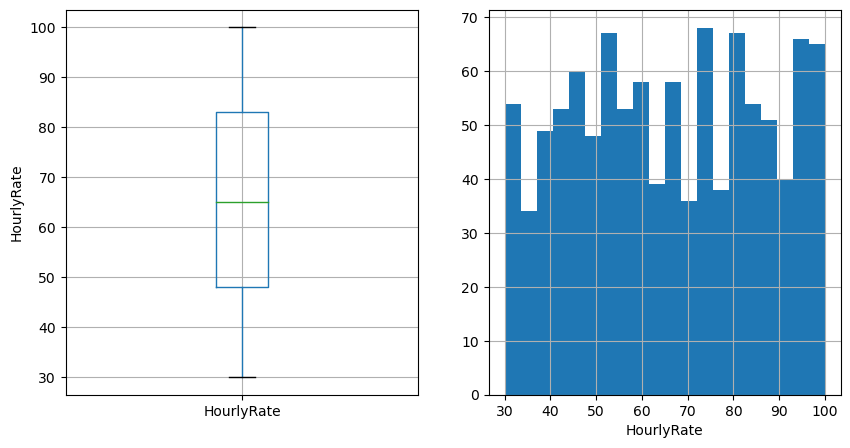

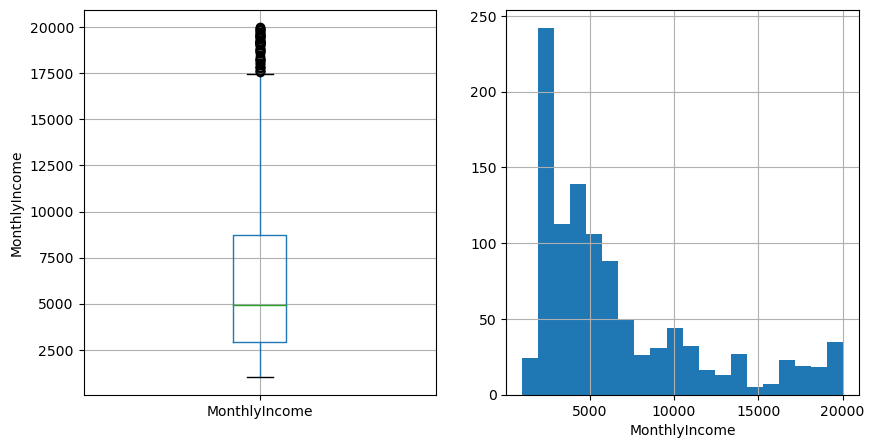

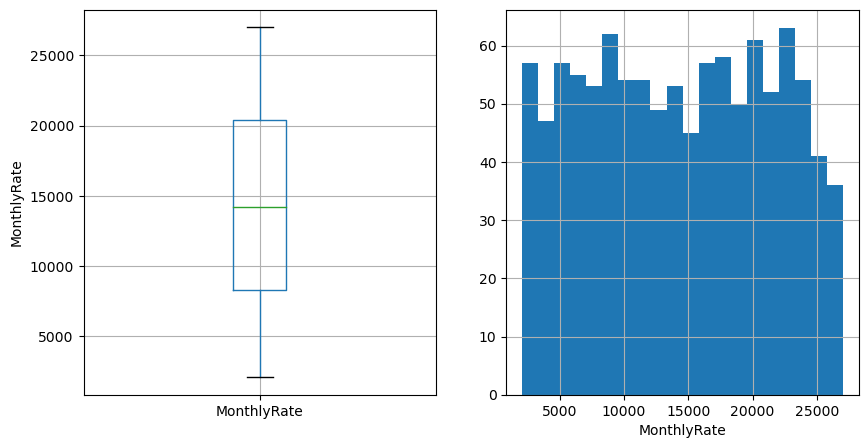

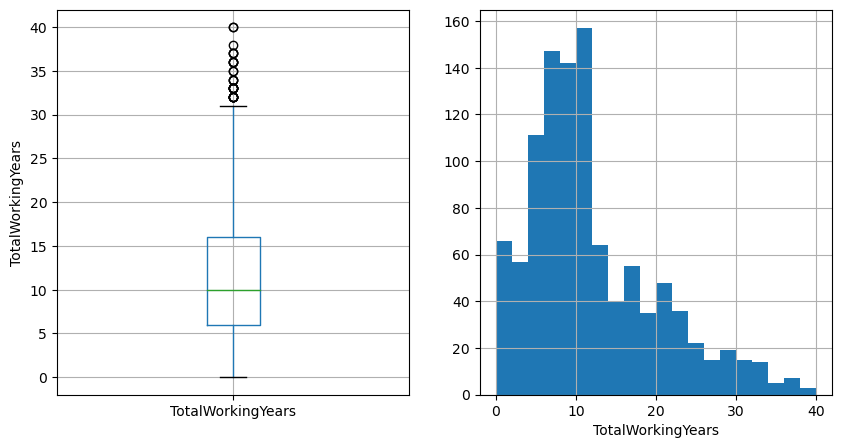

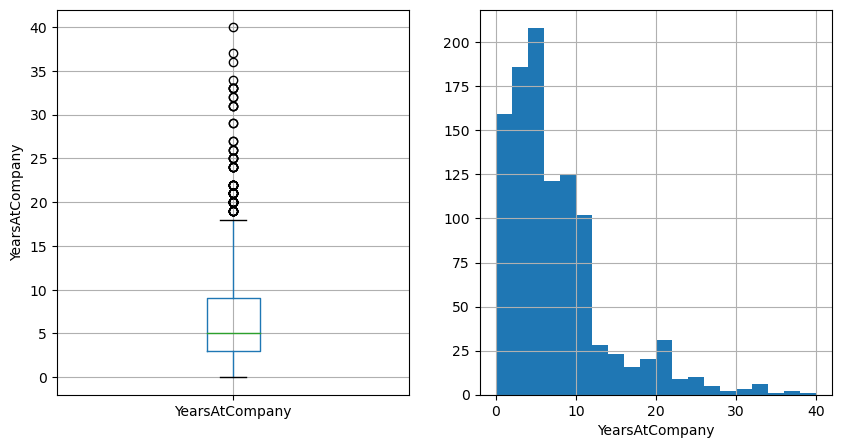

In [32]:
for var in continuous:
    #boxplot
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    fig = attrition.boxplot(column = var)
    fig.set_ylabel(var)
    
    #histogram
    plt.subplot(1, 2, 2)
    fig = attrition[var].hist(bins = 20)
    fig.set_xlabel("No. of Employees")
    fig.set_xlabel(var)
    
    plt.show()

In [33]:
attrition["TotalWorkingYears"].describe()

count    1058.000000
mean       11.435728
std         8.016429
min         0.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [34]:
categorical.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [35]:
"""
We can apply lambda functions to the dataframe that can modify the given columns within our dataframe.
"""

'\nWe can apply lambda functions to the dataframe that can modify the given columns within our dataframe.\n'

In [36]:
attrition_cat = pd.get_dummies(categorical)

In [37]:
attrition_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [38]:
numerical.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [39]:
attrition_final = pd.concat([numerical, attrition_cat], axis = 1)

In [40]:
attrition_final.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


In [41]:
attrition_final = attrition_final.drop("Attrition", axis = 1)

In [42]:
attrition_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [43]:
target = attrition["Attrition"]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(attrition_final,
                                                   target,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [46]:
x_train.shape

(846, 55)

In [47]:
x_test.shape

(212, 55)

In [48]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8915094339622641
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       182
           1       0.89      0.27      0.41        30

    accuracy                           0.89       212
   macro avg       0.89      0.63      0.68       212
weighted avg       0.89      0.89      0.87       212



In [49]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8915094339622641
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       182
           1       0.89      0.27      0.41        30

    accuracy                           0.89       212
   macro avg       0.89      0.63      0.68       212
weighted avg       0.89      0.89      0.87       212



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [50]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8018867924528302
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       182
           1       0.32      0.37      0.34        30

    accuracy                           0.80       212
   macro avg       0.61      0.62      0.61       212
weighted avg       0.81      0.80      0.81       212



In [51]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8254716981132075
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       182
           1       0.18      0.07      0.10        30

    accuracy                           0.83       212
   macro avg       0.52      0.51      0.50       212
weighted avg       0.76      0.83      0.79       212



In [52]:
model = SVC()
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8584905660377359
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       182
           1       0.00      0.00      0.00        30

    accuracy                           0.86       212
   macro avg       0.43      0.50      0.46       212
weighted avg       0.74      0.86      0.79       212



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
oversampler = SMOTE(random_state = 12, sampling_strategy = 1.0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

In [55]:
smote_train.shape

(1394, 55)

In [56]:
model = RandomForestClassifier()
model.fit(smote_train, smote_target)
model_predictions = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.9009433962264151
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       182
           1       0.76      0.43      0.55        30

    accuracy                           0.90       212
   macro avg       0.84      0.71      0.75       212
weighted avg       0.89      0.90      0.89       212

